In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text

In [139]:
pwd

'/Users/emilynaftalin/Data_Science/General Assembly/dsi/projects/Mass-Protests/users'

In [140]:
pd.options.display.max_colwidth = 200

In [141]:
mass = pd.read_pickle('../data/03_dummy_df.pickle')

In [142]:
mass.head(2)

,id,country,ccode,region,protestnumber,protesterviolence,location,protesteridentity,sources,notes,...,shootings,labor_wage_dispute,land_farm_issue,police_brutality,political_behavior_process,price increases_tax_policy,removal_of_politician,social_restrictions,start_date,end_date
0,201990001,Canada,20,North America,1,0.0,national,unspecified,"1. great canadian train journeys into history; passenger rail system cut the times london , january 16 1990, tuesday, issue 63604., 427 words, from john best, ottawa;","canada s railway passenger system was finally cut by half yesterday, with 18 of 38 routes run by via rail, the government owned passenger service, being eliminated in terms of an earlier decision....",...,0,1,0,0,1,0,0,0,1990-01-15,1990-01-15
1,201990002,Canada,20,North America,2,0.0,"Montreal, Quebec",unspecified,"1. autonomy s cry revived in quebec the new york times, june 25, 1990, monday, late edition final, section a; page 3, column 4; foreign desk, 1014 words, by alessandra stanley, special to the new ...","protestors were only identified as young people, and the gathering was spontaneous",...,0,0,0,0,1,0,0,0,1990-06-25,1990-06-25


In [143]:
mass.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15225 entries, 0 to 15224
Columns: 207 entries, id to end_date
dtypes: datetime64[ns](2), float64(6), int32(180), int64(11), object(8)
memory usage: 13.7+ MB


In [144]:
sorted(list(mass['country'].value_counts().index))[:10]

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Armenia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh']

In [145]:
mass['region'].value_counts()

Europe             4992
Africa             3181
Asia               3124
South America      1659
MENA               1259
North America       527
Central America     445
Oceania              38
Name: region, dtype: int64

In [146]:
# mass[mass['region']== 'Central America'].groupby('country').count()

In [147]:
# mass[mass['region']== 'North America'].groupby('country').count()

In [148]:
mass['notes_clean'] = mass['notes']

In [149]:
mass.shape

(15225, 208)

In [150]:
mass.columns

Index(['id', 'country', 'ccode', 'region', 'protestnumber',
       'protesterviolence', 'location', 'protesteridentity', 'sources',
       'notes',
       ...
       'labor_wage_dispute', 'land_farm_issue', 'police_brutality',
       'political_behavior_process', 'price increases_tax_policy',
       'removal_of_politician', 'social_restrictions', 'start_date',
       'end_date', 'notes_clean'],
      dtype='object', length=208)

In [151]:
# My way which doesn't entirely work. 

# def standardize_text(df, text_field):
    
#     '''Removes special characters and hyperlinks from dataframe'''
    
#     df[text_field] = df[text_field].str.replace(r"http\S+", "")
#     df[text_field] = df[text_field].str.replace(r"http", "")
#     df[text_field] = df[text_field].str.replace(r"@\S+", "")
#     df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\`\"\_\n]", " ")
#     df[text_field] = df[text_field].str.replace(r"'", "")
#     df[text_field] = df[text_field].str.replace(r"\s+[a-zA-Z]\s+", " ")
#     df[text_field] = df[text_field].str.replace(r"@", "at")
#     df[text_field] = df[text_field].str.lower()
    
#     return df

In [152]:
# standardize_text(mass, 'notes_clean')

In [153]:
# pd.options.display.max_colwidth = 300

In [154]:
# Paul's code whcih is likely more effective 

mass['notes_clean'].replace('\n', ' ', regex=True, inplace=True)

# Regex example here:
#https://github.com/hundredblocks/concrete_NLP_tutorial/blob/master/NLP_notebook.ipynb
# \S captures all non-white space, + means greedy so goes until the end of a word.
mass['notes_clean'].replace('http\S+', ' ', regex=True, inplace=True)

# delete stray &amp; words
mass['notes_clean'].replace('&amp;', ' ', regex=True, inplace=True)

# delete #x200B; which is zero width space
mass['notes_clean'].replace('#x200B;', ' ', regex=True, inplace=True)

# delete measurements in a recipe. eg. 5.3oz, 1 1/4 cups
# This deletes all numbers, which may or may not include a period or a /, then have a letter or series of letters on the end
# as in 57g
mass['notes_clean'].replace('(\d+)[.|\/]?(\d+)?(\w+)?', ' ', regex=True, inplace=True)

# delete underscores, backslashes and forward slashes
mass['notes_clean'].replace('_|\\|\/', ' ', regex=True, inplace=True)

# to avoid getting a ton of 've' words after vectorizing, replace I've with I have
mass['notes_clean'].replace('[i|I][\’|\']ve', 'I have', regex=True, inplace=True)

# replace don't with do not
mass['notes_clean'].replace('[d|D]on[\’|\']t', 'do not', regex=True, inplace=True)

# replace aren't with are not
mass['notes_clean'].replace('[a|A]ren[\’|\']t', 'are not', regex=True, inplace=True)

# replace doesn't with does not
mass['notes_clean'].replace('[d|D]oesn[\’|\']t', 'does not', regex=True, inplace=True)

In [155]:
# mass[ mass['notes'] != mass['notes_clean'] ]

In [156]:
# mass[['notes', 'notes_clean']]

In [157]:
# mass['notes_clean_e'] = mass['notes_clean']

In [158]:
mass[['notes', 'notes_clean']][20:25]

,notes,notes_clean
20,"with other opinion polls indicating that canadians view health care as the nation s top issue, ralph klein, the popular premier of alberta, unveiled a bill in march that americans might consider c...","with other opinion polls indicating that canadians view health care as the nation s top issue, ralph klein, the popular premier of alberta, unveiled a bill in march that americans might consider c..."
21,anti poverty protesters fought with the police outside the ontario legislature in toronto. several people were injured and at least three were arrested. protesting the austerity policies of ontari...,anti poverty protesters fought with the police outside the ontario legislature in toronto. several people were injured and at least three were arrested. protesting the austerity policies of ontari...
22,"the canadian flags that fly above the crab boats have been hoisted upside down, and some are defaced with swastikas. graffiti compares the federal fisheries minister to saddam hussein. four large ...","the canadian flags that fly above the crab boats have been hoisted upside down, and some are defaced with swastikas. graffiti compares the federal fisheries minister to saddam hussein. four large ..."
23,the scene on fashionable rue st. denis looked as if it came out of another era: hundreds of students staging a sit in in front of a liberal party office and blocking rush hour traffic on a tuesday...,the scene on fashionable rue st. denis looked as if it came out of another era: hundreds of students staging a sit in in front of a liberal party office and blocking rush hour traffic on a tuesday...
24,"a proposal to allow canadians to use muslim religious law, or sharia, to settle family disputes has provoked protests near and far... homa arjomand, who organised a protest that attracted about 30...","a proposal to allow canadians to use muslim religious law, or sharia, to settle family disputes has provoked protests near and far... homa arjomand, who organised a protest that attracted about ..."


### Stop Words

In [159]:
mass_stopwords = ['protest','protests','protester','protesters']
# all_stop_words = text.ENGLISH_STOP_WORDS.union(mass_stop_words)
all_stop_words = text.ENGLISH_STOP_WORDS

In [160]:
def vectorize_and_plot(df, text_field, color):
    cvec = CountVectorizer(stop_words=all_stop_words)
    col = df[text_field]
    cvec.fit(col)
    col = cvec.transform(col)
    plot_df = pd.DataFrame(col.todense(),
                          columns=cvec.get_feature_names())
    plot_df.sum().sort_values(ascending=False).head(15).plot(kind='barh', align='center', alpha=0.5, color=color);

### Plotting Most Frequent Words 

_Citation for this code that allowed me to find where my float values are: https://stackoverflow.com/questions/59756961/select-rows-from-pandas-dataframe-where-a-specific-column-contains-numbers_


In [161]:
def safe_float_convert(x):
    try:
        float(x)
        return True # numeric, success!
    except ValueError:
        return False # not numeric
    except TypeError:
        return False # null type

In [162]:
mask = mass['notes_clean'].map(safe_float_convert)

numeric_df = mass.loc[mask]

numeric_df[['notes_clean']].head()

_For this notebook, I am creating a new dataframe that doesn't include the columns that are null in the `notes` column so that I can visualize, vectorize, and otherwise use the text data._

_**NOTE**: Should we consider putting some word in the cells in place of the nan?_ 

In [165]:
notes_mass = mass.copy()

In [166]:
notes_mass.columns

Index(['id', 'country', 'ccode', 'region', 'protestnumber',
       'protesterviolence', 'location', 'protesteridentity', 'sources',
       'notes',
       ...
       'labor_wage_dispute', 'land_farm_issue', 'police_brutality',
       'political_behavior_process', 'price increases_tax_policy',
       'removal_of_politician', 'social_restrictions', 'start_date',
       'end_date', 'notes_clean'],
      dtype='object', length=208)

In [167]:
notes_mass = notes_mass[notes_mass['notes'].notna()]

In [168]:
notes_mass.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15179 entries, 0 to 15224
Columns: 208 entries, id to notes_clean
dtypes: datetime64[ns](2), float64(6), int32(180), int64(11), object(9)
memory usage: 13.8+ MB


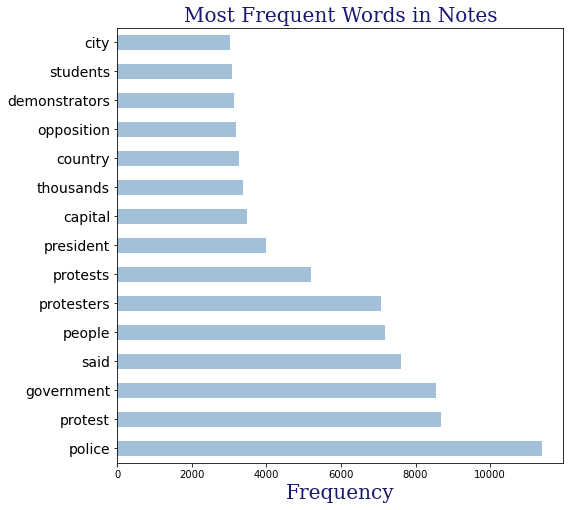

In [169]:
font = {'family': 'serif',
        'color':  'midnightblue',
        'weight': 'normal',
        'size': 20,
        }

plt.figure(figsize=(8, 8))
plt.plot(131)
vectorize_and_plot(notes_mass, 'notes_clean', 'steelblue')
plt.title('Most Frequent Words in Notes', fontdict=font)
plt.yticks(fontsize=14)
plt.xlabel('Frequency', fontdict=font)

plt.savefig('frequency.png')

### Checking out the Vader Library

In [170]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/emilynaftalin/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [171]:
pwd

'/Users/emilynaftalin/Data_Science/General Assembly/dsi/projects/Mass-Protests/users'

In [172]:
# code from Paul 
vader_lexicon = pd.read_csv('../data/vader_lexicon.txt', sep='\t', header=0, names=['token', 'mean_sentiment_rating', 'standard_deviation', 'raw_human_sentiment_ratings'])
vader_lexicon.iloc[3333:3345]

,token,mean_sentiment_rating,standard_deviation,raw_human_sentiment_ratings
3333,gorgeousness,2.9,0.94340,"[3, 4, 3, 1, 4, 4, 2, 2, 3, 3]"
3334,gorgeousnesses,2.1,0.70000,"[3, 2, 1, 3, 2, 2, 1, 2, 3, 2]"
3335,gossip,-0.7,0.45826,"[-1, -1, -1, 0, 0, -1, -1, 0, -1, -1]"
3336,gossiped,-1.1,0.53852,"[-1, -1, -1, -1, -1, -1, 0, -1, -2, -2]"
3337,gossiper,-1.1,0.70000,"[-1, -1, -1, 0, -2, -1, -1, -2, 0, -2]"
3338,gossipers,-1.1,0.53852,"[-1, 0, -1, -1, -1, -1, -1, -1, -2, -2]"
3339,gossiping,-1.6,0.48990,"[-1, -2, -1, -2, -1, -2, -2, -1, -2, -2]"
3340,gossipmonger,-1.0,1.41421,"[-1, -2, 1, -3, -2, 1, -1, -2, -2, 1]"
3341,gossipmongers,-1.4,0.66332,"[-2, -1, -1, -1, -2, -2, -1, 0, -2, -2]"
3342,gossipped,-1.3,0.90000,"[-2, -2, -1, -2, -1, -1, -2, -1, 1, -2]"


In [173]:
print (f'There are {vader_lexicon.shape[0]} words in the VADER lexicon.' )

There are 7519 words in the VADER lexicon.


In [174]:
# Instantiate Sentiment Intensity Analyzer
sent = SentimentIntensityAnalyzer()

According to the [documentation]('https://github.com/cjhutto/vaderSentiment'):

+ A score of -4 equates to Extremely Negative.
+ A score of 4 equates to Extremely Postiive. 

If the term is not in the Vader Lexicon, the score defaults to neutral. The analyzer always returns scores (negative, neutral, positive) that add up to 1. 

From the [documentation]('https://github.com/cjhutto/vaderSentiment'):
The compound score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive).

**Example using some frequent words:** 

In [175]:
print(f'"police" sentiment: {sent.polarity_scores("police")}')

"police" sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [176]:
print(f'"protest" sentiment: {sent.polarity_scores("protest")}')
print(f'"protester" sentiment: {sent.polarity_scores("protester")}')

"protest" sentiment: {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.25}
"protester" sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


**Now example using full entries from the `notes_clean` column:**

In [177]:
sent.polarity_scores("a proposal to allow canadians to use muslim religious law, or sharia, to settle family disputes has provoked protests near and far... homa arjomand, who organised a protest that attracted about people in toronto, said: the rise of sharia in canada...is a threat. women s rights are not negotiable and we will not tolerate the interference of religion in our justice system. ontario has allowed catholic and jewish faith based tribunals to settle family law matters on a voluntary basis since the practice drew little attention until muslim leaders demanded the same rights. canadian politicians must decide whether to exclude one religion or to scrap the religion based family courts altogether.")

{'neg': 0.126, 'neu': 0.775, 'pos': 0.099, 'compound': -0.3182}

In [178]:
sent.polarity_scores(notes_mass['notes_clean'].iloc[28])

{'neg': 0.359, 'neu': 0.641, 'pos': 0.0, 'compound': -0.8442}

In [179]:
notes_mass['notes_clean'].iloc[28]

'the protesters demanded that the canadian government apply pressure through sanctions on the sri lankan government to cease violence against tamil civilians.'

In [180]:
sent.polarity_scores('the protesters demanded that the canadian government apply pressure through sanctions on the sri lankan government to cease violence against tamil civilians.')

{'neg': 0.359, 'neu': 0.641, 'pos': 0.0, 'compound': -0.8442}

Loop through every row in the `notes_mass` DataFrame and append columns for the negative, neutral, positive, and compound scores. 

In [181]:
notes_mass['neg'] = [sent.polarity_scores(note)['neg'] for note in notes_mass['notes_clean']]
notes_mass['neu'] = [sent.polarity_scores(note)['neu'] for note in notes_mass['notes_clean']]
notes_mass['pos'] = [sent.polarity_scores(note)['pos'] for note in notes_mass['notes_clean']]
notes_mass['compound'] = [sent.polarity_scores(note)['compound'] for note in notes_mass['notes_clean']]

In [182]:
notes_mass.columns

Index(['id', 'country', 'ccode', 'region', 'protestnumber',
       'protesterviolence', 'location', 'protesteridentity', 'sources',
       'notes',
       ...
       'price increases_tax_policy', 'removal_of_politician',
       'social_restrictions', 'start_date', 'end_date', 'notes_clean', 'neg',
       'neu', 'pos', 'compound'],
      dtype='object', length=212)

In [183]:
# notes_mass.drop(columns=['neg','neu', 'pos', 'compound'], inplace=True)

In [184]:
# [ notes_mass.loc[note, notes_mass['neg'] = sent.polarity_scores(note)['neg'] for note in notes_mass['notes_clean'] ]

In [185]:
pd.options.display.max_colwidth = 100

In [186]:
notes_mass.head()

,id,country,ccode,region,protestnumber,protesterviolence,location,protesteridentity,sources,notes,...,price increases_tax_policy,removal_of_politician,social_restrictions,start_date,end_date,notes_clean,neg,neu,pos,compound
0,201990001,Canada,20,North America,1,0.0,national,unspecified,"1. great canadian train journeys into history; passenger rail system cut the times london , janu...","canada s railway passenger system was finally cut by half yesterday, with 18 of 38 routes run by...",...,0,0,0,1990-01-15,1990-01-15,"canada s railway passenger system was finally cut by half yesterday, with of routes run by v...",0.087,0.913,0.000,-0.8176
1,201990002,Canada,20,North America,2,0.0,"Montreal, Quebec",unspecified,"1. autonomy s cry revived in quebec the new york times, june 25, 1990, monday, late edition fina...","protestors were only identified as young people, and the gathering was spontaneous",...,0,0,0,1990-06-25,1990-06-25,"protestors were only identified as young people, and the gathering was spontaneous",0.000,1.000,0.000,0.0000
2,201990003,Canada,20,North America,3,0.0,"Montreal, Quebec",separatist parti quebecois,"1. quebec protest after queen calls for unity the times, july 2, 1990, monday, overseas news, 70...","the queen, after calling on canadians to remain united, braved protesters and entered french spe...",...,0,0,0,1990-07-01,1990-07-01,"the queen, after calling on canadians to remain united, braved protesters and entered french spe...",0.060,0.830,0.109,0.7003
3,201990004,Canada,20,North America,4,1.0,"Montreal, Quebec",mohawk indians,1. indians gather as siege intensifies; armed confrontation in canada reflects growing militancy...,canada s federal government has agreed to acquire a tract of land that has been the subject of a...,...,0,0,0,1990-07-12,1990-09-06,canada s federal government has agreed to acquire a tract of land that has been the subject of a...,0.134,0.820,0.046,-0.9711
4,201990005,Canada,20,North America,5,1.0,"Montreal, Quebec",local residents,"1. dozens hurt in mohawk blockade protest the times, august 14, 1990, tuesday, overseas news, 25...",protests were directed against the state due to its refusal to use violence to clear mohawk indi...,...,0,0,0,1990-08-14,1990-08-15,protests were directed against the state due to its refusal to use violence to clear mohawk indi...,0.226,0.677,0.098,-0.5267


In [187]:
pwd

'/Users/emilynaftalin/Data_Science/General Assembly/dsi/projects/Mass-Protests/users'

In [189]:
notes_mass.to_pickle('../data/03_mass_notes_sentiment_analysis.pickle')